<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_02_ProjTwo_Supverised_Clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from scipy.io import arff
import os

In [ ]:
import sys
import sklearn
print(sys.version)
!python --version
print("numpy: ", np.__version__)
print("sklearn: ", sklearn.__version__)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path = './arff_files/'
rootdir = './arff_files/'

3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
Python 3.11.4
numpy:  1.23.5
sklearn:  1.2.2


In [ ]:
def get_id(fname):

    return fname.split('_')[1]

def clean_file_df(fname, in_path, out_path):

    num_id = get_id(fname)

    with open(in_path, 'r') as file:
        flist = file.readlines()

    flist[2] = '@attribute "ACTIVITY" { A, B, C, D, E, F, G, H, I, J, K, L, M, O, P, Q, R, S}\n'
    flist[94] = '@attribute "class" numeric \n'

    with open(out_path, 'w') as file:
        file.writelines(flist)
    file.close()

    data = arff.loadarff(out_path)
    temp = pd.DataFrame(data[0])
    temp.columns = [x.replace('"', '') for x in temp.columns]
    temp['ACTIVITY'] = temp['ACTIVITY'].str.decode('utf-8')

    temp.insert(loc=0, column='fname', value=fname)
    temp.insert(loc=1, column='sensor', value=fname.split('_')[2])
    temp.insert(loc=2, column='device', value=fname.split('_')[3].split('.')[0])

    temp['class'] = num_id

    os.remove(out_path)

    return temp

In [ ]:
init = 1
for subdir, dirs, files in os.walk(rootdir):
    print('subdir:\n', subdir, '\n dirs:\n', dirs, '\nfiles:\n', files, '\n')

    for fname in files:
        if (fname.split('_')[0]=='data'):

            in_path = subdir + '/' + fname
            out_path = 'clean_file.arff'
            temp = clean_file_df(fname, in_path, out_path)
            if(init == 1):
                dfmain = temp.copy()
                init -= 1
            else:
                dfmain = pd.concat([dfmain, temp])

subdir:
 ./arff_files/ 
 dirs:
 ['phone', 'watch'] 
files:
 ['.DS_Store'] 

subdir:
 ./arff_files/phone 
 dirs:
 ['gyro', 'accel'] 
files:
 ['.DS_Store'] 

subdir:
 ./arff_files/phone/gyro 
 dirs:
 [] 
files:
 ['data_1615_gyro_phone.arff', 'data_1628_gyro_phone.arff', 'data_1631_gyro_phone.arff', 'data_1603_gyro_phone.arff', 'data_1644_gyro_phone.arff', 'data_1627_gyro_phone.arff', 'data_1620_gyro_phone.arff', '.DS_Store', 'data_1643_gyro_phone.arff', 'data_1604_gyro_phone.arff', 'data_1639_gyro_phone.arff', 'data_1636_gyro_phone.arff', 'data_1612_gyro_phone.arff', 'data_1621_gyro_phone.arff', 'data_1605_gyro_phone.arff', 'data_1638_gyro_phone.arff', 'data_1642_gyro_phone.arff', 'data_1637_gyro_phone.arff', 'data_1613_gyro_phone.arff', 'data_1629_gyro_phone.arff', 'data_1630_gyro_phone.arff', 'data_1645_gyro_phone.arff', 'data_1602_gyro_phone.arff', 'data_1626_gyro_phone.arff', 'data_1607_gyro_phone.arff', 'data_1640_gyro_phone.arff', 'data_1623_gyro_phone.arff', 'data_1611_gyro_phone.

In [ ]:
dfmain.shape

(75099, 96)

In [ ]:
dfmain.columns

Index(['fname', 'sensor', 'device', 'ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8',
       'Z9', 'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV',
       'YABSOLDEV', 'ZABSOLDEV', 'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR',
       'YVAR', 'ZVAR', 'XMFCC0', 'XMFCC1', 'XMFCC2', 'XMFCC3', 'XMFCC4',
       'XMFCC5', 'XMFCC6', 'XMFCC7', 'XMFCC8', 'XMFCC9', 'XMFCC10', 'XMFCC11',
       'XMFCC12', 'YMFCC0', 'YMFCC1', 'YMFCC2', 'YMFCC3', 'YMFCC4', 'YMFCC5',
       'YMFCC6', 'YMFCC7', 'YMFCC8', 'YMFCC9', 'YMFCC10', 'YMFCC11', 'YMFCC12',
       'ZMFCC0', 'ZMFCC1', 'ZMFCC2', 'ZMFCC3', 'ZMFCC4', 'ZMFCC5', 'ZMFCC6',
       'ZMFCC7', 'ZMFCC8', 'ZMFCC9', 'ZMFCC10', 'ZMFCC11', 'ZMFCC12', 'XYCOS',
       'XZCOS', 'YZCOS', 'XYCOR', 'XZCOR', 'YZCOR', 'RESULTANT', 'class'],
      dtype='object')

In [ ]:
dfmain.head(5)

,fname,sensor,device,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,data_1615_gyro_phone.arff,gyro,phone,A,0.020,0.420,0.535,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.060,0.470,0.455,0.015,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.535,0.420,0.035,0.01,0.0,0.0,0.0,0.0,0.0,0.154516,-0.206602,0.149170,46.4286,40.4255,40.000,1.03280,1.20531,0.694381,0.091139,0.104292,0.075643,0.301893,0.322942,0.275033,0.282374,0.399123,0.398482,0.397414,0.395921,0.394003,0.391664,0.388905,0.385730,0.382142,0.378144,0.373742,0.368939,0.304572,0.430499,0.429808,0.428656,0.427045,0.424977,0.422454,0.419478,0.416053,0.412183,0.407871,0.403123,0.397943,0.267727,0.378421,0.377813,0.376800,0.375384,0.373566,0.371348,0.368733,0.365722,0.362320,0.358530,0.354356,0.349803,0.276576,0.329367,-0.119525,0.298069,0.318219,-0.102327,1.96084,1615
1,data_1615_gyro_phone.arff,gyro,phone,A,0.055,0.380,0.535,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.030,0.430,0.500,0.035,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.530,0.470,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.036212,0.053246,-0.062581,43.1111,31.2903,38.000,1.20162,1.30433,0.451905,0.102023,0.107565,0.041241,0.319410,0.327972,0.203078,0.274376,0.387819,0.387196,0.386158,0.384707,0.382844,0.380571,0.377890,0.374805,0.371318,0.367434,0.363156,0.358490,0.291939,0.412643,0.411980,0.410876,0.409331,0.407349,0.404931,0.402078,0.398796,0.395086,0.390953,0.386401,0.381436,0.170940,0.241616,0.241228,0.240582,0.239677,0.238517,0.237101,0.235431,0.233508,0.231336,0.228916,0.226251,0.223344,0.683663,0.469926,0.357442,0.683419,0.475466,0.363470,1.97104,1615
2,data_1615_gyro_phone.arff,gyro,phone,A,0.055,0.410,0.510,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.030,0.465,0.470,0.035,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.550,0.450,0.000,0.00,0.0,0.0,0.0,0.0,0.0,-0.024738,-0.062111,-0.100830,42.8261,35.0000,37.200,1.21366,1.19224,0.478609,0.103472,0.100090,0.042808,0.321670,0.316370,0.206900,0.286023,0.404281,0.403631,0.402550,0.401037,0.399095,0.396725,0.393931,0.390715,0.387080,0.383031,0.378572,0.373707,0.278205,0.393230,0.392598,0.391546,0.390075,0.388186,0.385881,0.383163,0.380035,0.376499,0.372561,0.368224,0.363492,0.175066,0.247448,0.247050,0.246388,0.245462,0.244273,0.242823,0.241113,0.239144,0.236920,0.234441,0.231712,0.228734,0.572635,0.348131,0.225733,0.572527,0.350161,0.221754,1.95392,1615
3,data_1615_gyro_phone.arff,gyro,phone,A,0.070,0.340,0.560,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.035,0.390,0.525,0.045,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.585,0.415,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.031108,0.182037,-0.063169,41.7021,34.4643,40.000,1.26953,1.21967,0.402955,0.107696,0.105724,0.037810,0.328171,0.325152,0.194449,0.284886,0.402674,0.402027,0.400950,0.399443,0.397509,0.395148,0.392365,0.389162,0.385542,0.381509,0.377067,0.372222,0.298639,0.422114,0.421436,0.420306,0.418727,0.416699,0.414225,0.411307,0.407949,0.404154,0.399926,0.395270,0.390191,0.169665,0.239814,0.239429,0.238787,0.237890,0.236738,0.235332,0.233674,0.231767,0.229611,0.227209,0.224564,0.221678,0.599439,0.377462,0.380009,0.601505,0.382579,0.399860,2.01721,1615
4,data_1615_gyro_phone.arff,gyro,phone,A,0.075,0.375,0.505,0.045,0.0,0.0,0.0,0.0,0.0,0.0,0.030,0.485,0.425,0.055,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.610,0.390,0.000,0.00,0.0,0.0,0.0,0.0,0.0,-0.006077,-0.021687,-0.106363,38.7755,38.0392,40.625,1.42033,1.23274,0.433437,0.118420,0.109816,0.039012,0.344123,0.331384,0.197514,0.299246,0.422971,0.422291,0.421159,0.419577,0.417545,0.415066,0.412142,0.408777,0.404974,0.400738,0.396073,0.390983,0.304246,0.430038,0.429347,0.428196,0.426587,0.424521,0.422001,

In [ ]:
print(dfmain.sensor.unique())
print(dfmain.device.unique())

['gyro' 'accel']
['phone' 'watch']


<Axes: >

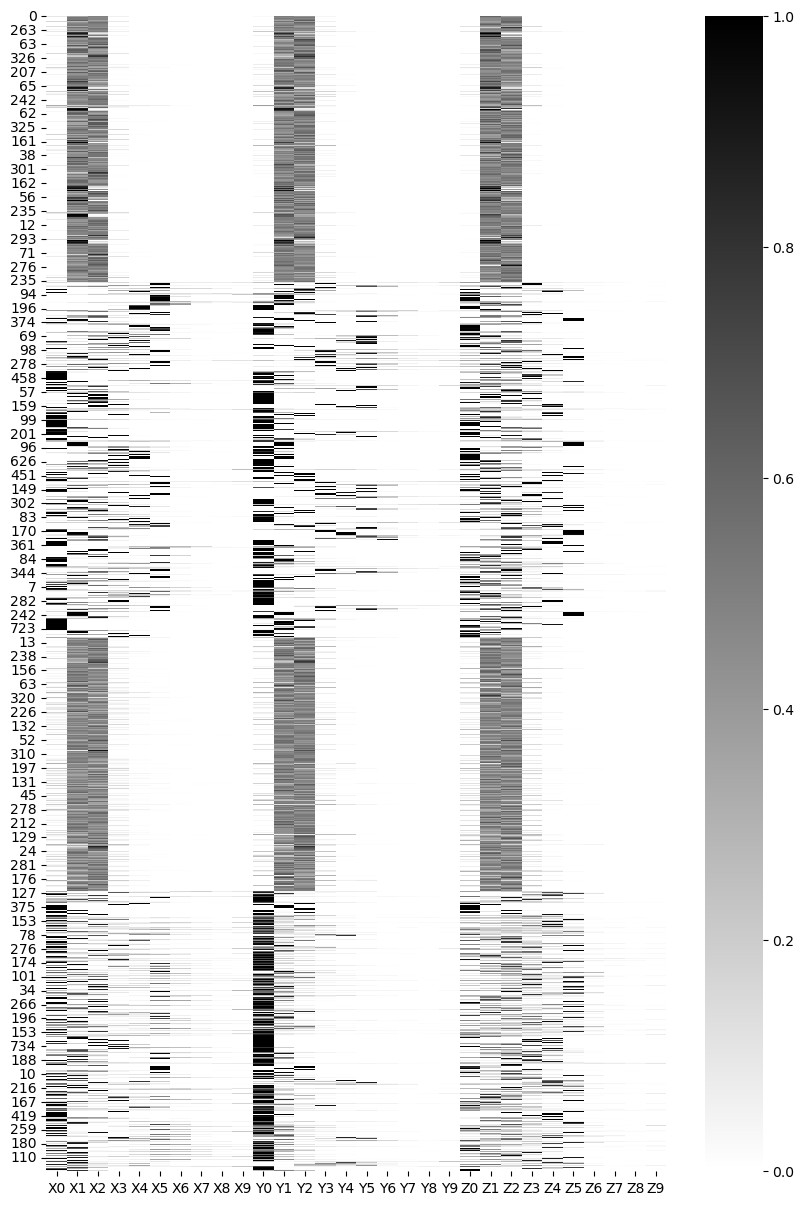

In [ ]:
fig = plt.figure(figsize=(10,15))
sns.heatmap(dfmain.iloc[:, 0+4: 30+4], cmap='binary')

In [ ]:
n = str(0)
dd = dfmain[dfmain['ACTIVITY'].isin(['A', 'B', 'P', 'R', 'S'])]

print(dd.columns)
px.scatter_3d(dd, x='X'+n, y='Y'+n, z='Z'+n, opacity=0.1, color='ACTIVITY')

Index(['fname', 'sensor', 'device', 'ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8',
       'Z9', 'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV',
       'YABSOLDEV', 'ZABSOLDEV', 'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR',
       'YVAR', 'ZVAR', 'XMFCC0', 'XMFCC1', 'XMFCC2', 'XMFCC3', 'XMFCC4',
       'XMFCC5', 'XMFCC6', 'XMFCC7', 'XMFCC8', 'XMFCC9', 'XMFCC10', 'XMFCC11',
       'XMFCC12', 'YMFCC0', 'YMFCC1', 'YMFCC2', 'YMFCC3', 'YMFCC4', 'YMFCC5',
       'YMFCC6', 'YMFCC7', 'YMFCC8', 'YMFCC9', 'YMFCC10', 'YMFCC11', 'YMFCC12',
       'ZMFCC0', 'ZMFCC1', 'ZMFCC2', 'ZMFCC3', 'ZMFCC4', 'ZMFCC5', 'ZMFCC6',
       'ZMFCC7', 'ZMFCC8', 'ZMFCC9', 'ZMFCC10', 'ZMFCC11', 'ZMFCC12', 'XYCOS',
       'XZCOS', 'YZCOS', 'XYCOR', 'XZCOR', 'YZCOR', 'RESULTANT', 'class'],
      dtype='object')


In [ ]:
n = str(0)
dlist = "(dfmain['X3']!=0) &(dfmain['X4']!=0) & (dfmain['X5']!=0) &(dfmain['X6']!=0) &(dfmain['X7']!=0) &(dfmain['X8']!=0) &(dfmain['X9']!=0)"
dd = dfmain[eval(dlist)]
dd = dd[dd['ACTIVITY'].isin(['A', 'B', 'P', 'R', 'S'])]
print(dd.columns)
px.scatter_3d(dd, x='X'+n, y='Y'+n, z='Z'+n, opacity=0.1, color='ACTIVITY')

Index(['fname', 'sensor', 'device', 'ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'Y0', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8',
       'Z9', 'XAVG', 'YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV',
       'YABSOLDEV', 'ZABSOLDEV', 'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'XVAR',
       'YVAR', 'ZVAR', 'XMFCC0', 'XMFCC1', 'XMFCC2', 'XMFCC3', 'XMFCC4',
       'XMFCC5', 'XMFCC6', 'XMFCC7', 'XMFCC8', 'XMFCC9', 'XMFCC10', 'XMFCC11',
       'XMFCC12', 'YMFCC0', 'YMFCC1', 'YMFCC2', 'YMFCC3', 'YMFCC4', 'YMFCC5',
       'YMFCC6', 'YMFCC7', 'YMFCC8', 'YMFCC9', 'YMFCC10', 'YMFCC11', 'YMFCC12',
       'ZMFCC0', 'ZMFCC1', 'ZMFCC2', 'ZMFCC3', 'ZMFCC4', 'ZMFCC5', 'ZMFCC6',
       'ZMFCC7', 'ZMFCC8', 'ZMFCC9', 'ZMFCC10', 'ZMFCC11', 'ZMFCC12', 'XYCOS',
       'XZCOS', 'YZCOS', 'XYCOR', 'XZCOR', 'YZCOR', 'RESULTANT', 'class'],
      dtype='object')


In [ ]:
df = dfmain[dfmain['ACTIVITY'].isin(['A', 'B',  'P', 'R', 'S'])].copy()
print(df.shape)

(21016, 96)


In [ ]:
df_sen_dev = df.copy()
df_sen_dev = pd.get_dummies(data=df_sen_dev[['sensor', 'device']], columns =['sensor', 'device'])
df_sen_dev.shape

(21016, 4)

In [ ]:
df_sen_dev.head(2)

,sensor_accel,sensor_gyro,device_phone,device_watch
0,0,1,1,0
1,0,1,1,0


In [ ]:
dfr = df.copy()
dfr.shape

(21016, 96)

In [ ]:
xyzlist = [['X'+str(i), 'Y'+str(i), 'Z'+str(i)] for i in range(10)]
print(xyzlist)

xyzt=[]
temp, xyz_sum, xyz_prod = 0, 0, 1.0
zc = np.zeros([dfr.shape[0]])

for xyz in xyzlist:

    col = ''.join([xyz[0], xyz[1], xyz[2]])
    dfr[col] = ((dfr.loc[:, xyz[0]]**2)+(dfr.loc[:, xyz[1]]**2)+(dfr.loc[:, xyz[2]]**2))**.5

    temp += (dfr.loc[:, xyz[0]]**2 + dfr.loc[:, xyz[1]]**2 + dfr.loc[:, xyz[2]]**2)

    m1 = (dfr.loc[:, xyz[0]]==0).astype(int)
    m2 = (dfr.loc[:, xyz[1]]==0).astype(int)
    m3 = (dfr.loc[:, xyz[2]]==0).astype(int)
    zc += (m1 + m2 +m3)

dfr['XYZ_0-9_zc'] = zc

dfr['XYZ_sum'] = xyz_sum
dfr['XYZ_prod'] = xyz_prod


temp = np.sqrt(temp)
print(type(temp), temp.shape)
dfr['dist']=temp

print("dfr.shape:", dfr.shape)
dfr.head(2)

[['X0', 'Y0', 'Z0'], ['X1', 'Y1', 'Z1'], ['X2', 'Y2', 'Z2'], ['X3', 'Y3', 'Z3'], ['X4', 'Y4', 'Z4'], ['X5', 'Y5', 'Z5'], ['X6', 'Y6', 'Z6'], ['X7', 'Y7', 'Z7'], ['X8', 'Y8', 'Z8'], ['X9', 'Y9', 'Z9']]
<class 'pandas.core.series.Series'> (21016,)
dfr.shape: (21016, 110)


,fname,sensor,device,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class,X0Y0Z0,X1Y1Z1,X2Y2Z2,X3Y3Z3,X4Y4Z4,X5Y5Z5,X6Y6Z6,X7Y7Z7,X8Y8Z8,X9Y9Z9,XYZ_0-9_zc,XYZ_sum,XYZ_prod,dist
0,data_1615_gyro_phone.arff,gyro,phone,A,0.020,0.42,0.535,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.47,0.455,0.015,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.535,0.42,0.035,0.01,0.0,0.0,0.0,0.0,0.0,0.154516,-0.206602,0.149170,46.4286,40.4255,40.0,1.03280,1.20531,0.694381,0.091139,0.104292,0.075643,0.301893,0.322942,0.275033,0.282374,0.399123,0.398482,0.397414,0.395921,0.394003,0.391664,0.388905,0.385730,0.382142,0.378144,0.373742,0.368939,0.304572,0.430499,0.429808,0.428656,0.427045,0.424977,0.422454,0.419478,0.416053,0.412183,0.407871,0.403123,0.397943,0.267727,0.378421,0.377813,0.376800,0.375384,0.373566,0.371348,0.368733,0.365722,0.362320,0.358530,0.354356,0.349803,0.276576,0.329367,-0.119525,0.298069,0.318219,-0.102327,1.96084,1615,0.063246,0.826756,0.818321,0.045552,0.010,0.0,0.0,0.0,0.0,0.0,18.0,0,1.0,1.165912
1,data_1615_gyro_phone.arff,gyro,phone,A,0.055,0.38,0.535,0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.43,0.500,0.035,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.530,0.47,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.036212,0.053246,-0.062581,43.1111,31.2903,38.0,1.20162,1.30433,0.451905,0.102023,0.107565,0.041241,0.319410,0.327972,0.203078,0.274376,0.387819,0.387196,0.386158,0.384707,0.382844,0.380571,0.377890,0.374805,0.371318,0.367434,0.363156,0.358490,0.291939,0.412643,0.411980,0.410876,0.409331,0.407349,0.404931,0.402078,0.398796,0.395086,0.390953,0.386401,0.381436,0.170940,0.241616,0.241228,0.240582,0.239677,0.238517,0.237101,0.235431,0.233508,0.231336,0.228916,0.226251,0.223344,0.683663,0.469926,0.357442,0.683419,0.475466,0.363470,1.97104,1615,0.062650,0.781153,0.870129,0.046098,0.005,0.0,0.0,0.0,0.0,0.0,19.0,0,1.0,1.171921


In [ ]:
dlist = "(dfr['X2']!=0) & (dfr['X3']!=0) & (dfr['X4']!=0) & (dfr['X5']!=0) & (dfr['X6']!=0) & (dfr['X7']!=0) & (dfr['X8']!=0) & (dfr['X9']!=0)"
dfr = dfr[eval(dlist)]
idx = dfr.index

print(dfr.columns)
dfr.shape

Index(['fname', 'sensor', 'device', 'ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4',
       'X5',
       ...
       'X4Y4Z4', 'X5Y5Z5', 'X6Y6Z6', 'X7Y7Z7', 'X8Y8Z8', 'X9Y9Z9',
       'XYZ_0-9_zc', 'XYZ_sum', 'XYZ_prod', 'dist'],
      dtype='object', length=110)


(2548, 110)

In [ ]:
dfr.columns

Index(['fname', 'sensor', 'device', 'ACTIVITY', 'X0', 'X1', 'X2', 'X3', 'X4',
       'X5',
       ...
       'X4Y4Z4', 'X5Y5Z5', 'X6Y6Z6', 'X7Y7Z7', 'X8Y8Z8', 'X9Y9Z9',
       'XYZ_0-9_zc', 'XYZ_sum', 'XYZ_prod', 'dist'],
      dtype='object', length=110)

<Axes: >

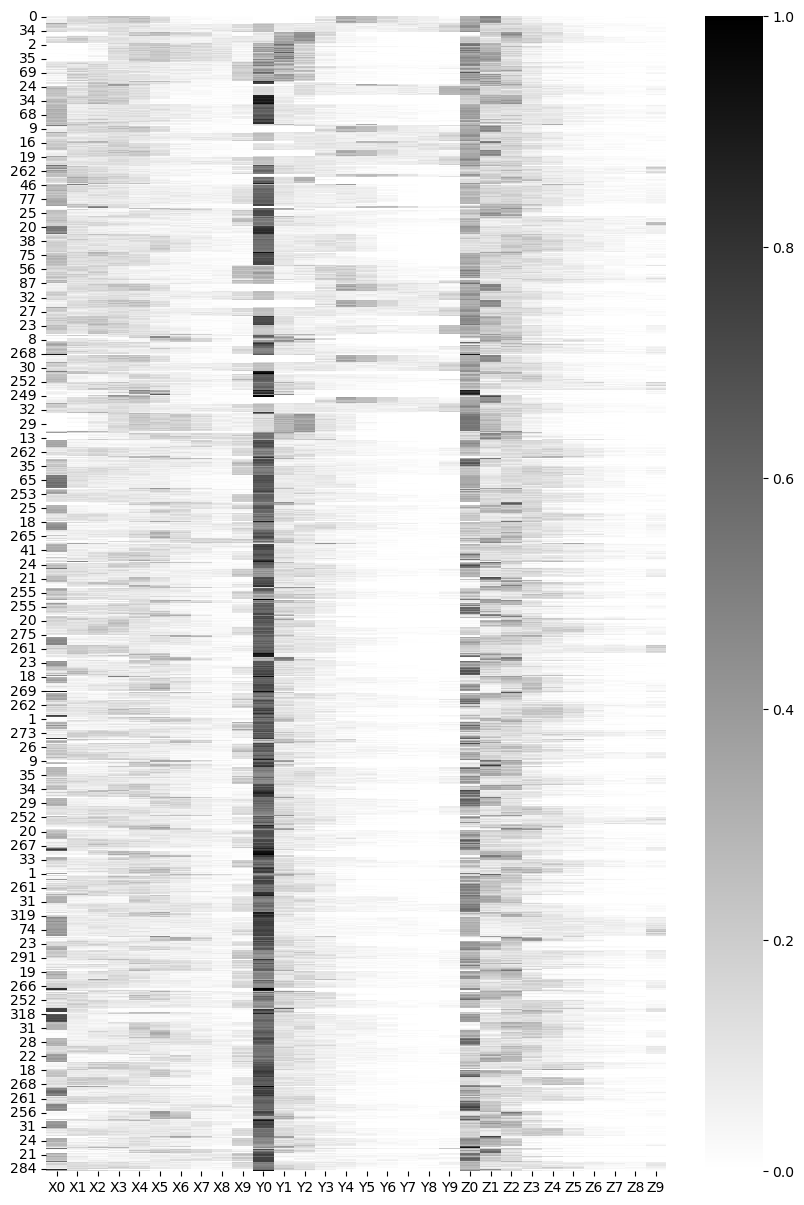

In [ ]:
fig = plt.figure(figsize=(10,15))
sns.heatmap(dfr.iloc[:, 0+4:30+4], cmap='binary')

In [ ]:
dfr.groupby(['sensor'])['sensor'].count()

sensor
accel    2544
gyro        4
Name: sensor, dtype: int64

In [ ]:
dfr.groupby(['device'])['device'].count()

device
phone     916
watch    1632
Name: device, dtype: int64

In [ ]:
dfr.groupby(['ACTIVITY'])['ACTIVITY'].count()

ACTIVITY
A     410
B    1234
P     758
R      46
S     100
Name: ACTIVITY, dtype: int64

In [ ]:
dfr = dfr.drop(['fname', 'sensor', 'device', 'class'], axis=1)

In [ ]:
X = dfr[dfr.columns[~dfr.columns.isin(['ACTIVITY'])]]
y = dfr['ACTIVITY']
print(y.sort_values().unique())

['A' 'B' 'P' 'R' 'S']


In [ ]:
X.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X4Y4Z4', 'X5Y5Z5', 'X6Y6Z6', 'X7Y7Z7', 'X8Y8Z8', 'X9Y9Z9',
       'XYZ_0-9_zc', 'XYZ_sum', 'XYZ_prod', 'dist'],
      dtype='object', length=105)

In [ ]:
X = X[X.columns[(X.var(axis=0)>0).values]]
print(X.shape)
X.head(10)

(2548, 103)


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,X0Y0Z0,X1Y1Z1,X2Y2Z2,X3Y3Z3,X4Y4Z4,X5Y5Z5,X6Y6Z6,X7Y7Z7,X8Y8Z8,X9Y9Z9,XYZ_0-9_zc,dist
0,0.060,0.110,0.215,0.255,0.240,0.070,0.030,0.010,0.005,0.005,0.0,0.0,0.005,0.080,0.330,0.270,0.155,0.090,0.060,0.010,0.310,0.490,0.110,0.045,0.020,0.010,0.010,0.000,0.005,0.000,3.75362,8.93719,-1.231170,43.8636,33.5088,38.0392,2.92030,2.79242,2.07808,0.271252,0.245507,0.220632,0.520818,0.495487,0.469715,0.447210,0.632112,0.631097,0.629406,0.627040,0.624004,0.620299,0.615929,0.610901,0.605218,0.598887,0.591915,0.584309,0.471347,0.666228,0.665157,0.663375,0.660882,0.657681,0.653776,0.649171,0.643871,0.637882,0.631209,0.623861,0.615844,0.416221,0.588310,0.587365,0.585791,0.583589,0.580763,0.577315,0.573248,0.568568,0.563279,0.557387,0.550898,0.543819,0.751094,-0.005809,-0.376951,0.383184,0.377359,-0.103380,10.7499,0.315753,0.502195,0.241557,0.271017,0.408534,0.279106,0.158193,0.090554,0.060415,0.011180,4.0,0.874929
1,0.050,0.130,0.170,0.220,0.285,0.090,0.020,0.020,0.010,0.005,0.0,0.0,0.000,0.050,0.385,0.250,0.165,0.060,0.075,0.015,0.335,0.430,0.145,0.035,0.035,0.010,0.005,0.000,0.000,0.005,3.88754,8.95497,-1.260790,45.2381,33.1034,35.4545,3.13264,2.72712,2.11061,0.284434,0.240149,0.224668,0.533323,0.490050,0.473991,0.445335,0.629462,0.628451,0.626767,0.624411,0.621387,0.617698,0.613347,0.608339,0.602680,0.596376,0.589433,0.581859,0.460281,0.650587,0.649541,0.647801,0.645366,0.642241,0.638428,0.633931,0.628755,0.622906,0.616390,0.609214,0.601386,0.411881,0.582175,0.581240,0.579682,0.577504,0.574707,0.571295,0.567271,0.562640,0.557406,0.551575,0.545153,0.538148,0.741898,0.069865,-0.368142,0.361264,0.488030,-0.070615,10.8633,0.338711,0.449222,0.223439,0.228309,0.480286,0.265895,0.166283,0.063246,0.075664,0.016583,5.0,0.870402
2,0.070,0.135,0.165,0.250,0.190,0.130,0.025,0.015,0.010,0.010,0.0,0.0,0.005,0.100,0.320,0.250,0.165,0.075,0.070,0.015,0.305,0.495,0.095,0.045,0.020,0.020,0.000,0.000,0.015,0.005,3.87522,8.84818,-1.052170,47.4359,32.3729,36.6038,3.39478,2.82586,2.28592,0.307110,0.248902,0.263985,0.554175,0.498901,0.513794,0.455201,0.643407,0.642373,0.640652,0.638244,0.635153,0.631382,0.626935,0.621816,0.616032,0.609588,0.602491,0.594749,0.457425,0.646551,0.645512,0.643782,0.641363,0.638257,0.634467,0.629998,0.624854,0.619042,0.612566,0.605435,0.597655,0.438750,0.620154,0.619158,0.617498,0.615178,0.612198,0.608564,0.604277,0.599344,0.593768,0.587557,0.580717,0.573254,0.689070,0.227904,-0.299957,0.255459,0.568801,-0.134642,10.9722,0.312930,0.513079,0.190460,0.272993,0.372693,0.282489,0.166883,0.076485,0.072284,0.018708,4.0,0.854371
4,0.085,0.145,0.145,0.175,0.285,0.100,0.030,0.020,0.005,0.010,0.0,0.0,0.005,0.045,0.360,0.305,0.150,0.060,0.050,0.025,0.305,0.505,0.100,0.050,0.010,0.020,0.000,0.000,0.010,0.000,3.83790,8.85265,-1.145310,46.4286,32.2951,36.7925,3.50238,2.68869,1.98273,0.308464,0.242619,0.224986,0.555396,0.492564,0.474327,0.460557,0.650977,0.649932,0.648190,0.645754,0.642627,0.638811,0.634312,0.629133,0.623280,0.616760,0.609580,0.601747,0.460292,0.650603,0.649558,0.647817,0.645383,0.642257,0.638444,0.633947,0.628771,0.622922,0.616406,0.609230,0.601401,0.429226,0.606692,0.605717,0.604094,0.601824,0.598909,0.595353,0.591160,0.586333,0.580879,0.574803,0.568111,0.560811,0.700471,0.057924,-0.399338,0.311718,0.398679,-0.245695,10.8796,0.316623,0.525405,0.176210,0.187483,0.459266,0.321598,0.152971,0.063246,0.051235,0.026926,5.0,0.887468
6,0.025,0.135,0.195,0.175,0.280,0.135,0.015,0.025,0.005,0.010,0.0,0.0,0.005,0.060,0.350,0.

In [ ]:
def remove_collinear_cols(X):

    cols = list(X.columns)
    print("Number of features (before):", len(cols))

    for col in cols:
        for icol in cols:
            if (col != icol):
                rsq = np.corrcoef(X[col], X[icol])[0,1]**2
                if(rsq >=0.7):
                    cols.remove(icol)

    print("Number of features (after): ", len(cols))
    return cols

new_cols = remove_collinear_cols(X)
new_cols = remove_collinear_cols(X[new_cols])

Number of features (before): 103
Number of features (after):  54
Number of features (before): 54
Number of features (after):  51


In [ ]:
X = X[new_cols]
X.shape

(2548, 51)

<Axes: >

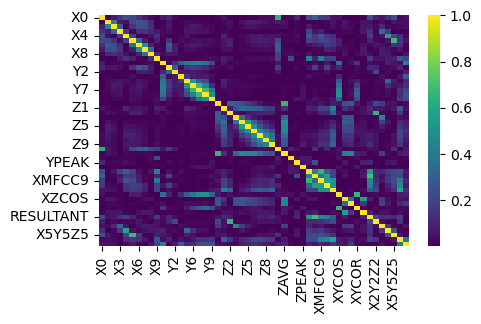

In [ ]:
fig = plt.figure(figsize=(5,3))
x_corr = X.corr()**2
sns.heatmap(x_corr, cmap='viridis')

In [ ]:
X.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y0', 'Y1',
       'Y2', 'Y3', 'Y4', 'Y6', 'Y7', 'Y8', 'Y9', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4',
       'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'XAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK',
       'XABSOLDEV', 'YABSOLDEV', 'XMFCC9', 'YMFCC10', 'ZMFCC7', 'XYCOS',
       'XZCOS', 'YZCOS', 'XYCOR', 'XZCOR', 'RESULTANT', 'X2Y2Z2', 'X3Y3Z3',
       'X4Y4Z4', 'X5Y5Z5', 'XYZ_0-9_zc', 'dist'],
      dtype='object')

(array([737., 635., 544., 372., 127.,  66.,  22.,  26.,  17.,   2.]),
 array([0.   , 0.094, 0.188, 0.282, 0.376, 0.47 , 0.564, 0.658, 0.752,
        0.846, 0.94 ]),
 <BarContainer object of 10 artists>)

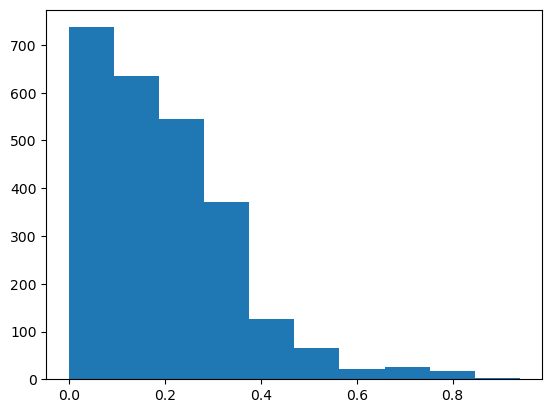

In [ ]:
plt.hist(X['X0'])

In [ ]:
def q_transform(col):
    xx = np.array(col).reshape(-1,1)
    rng = preprocessing.QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=0)
    #rng = preprocessing.PowerTransformer(method='yeo-johnson')

    xx=rng.fit_transform(xx)
    return xx

In [ ]:
X_col = X.columns
for col in X_col:
    X[col] = q_transform(X[col])

In [ ]:
X.shape

(2548, 51)

(array([177.,   0.,   0., 191., 922., 879., 329.,  49.,   0.,   1.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

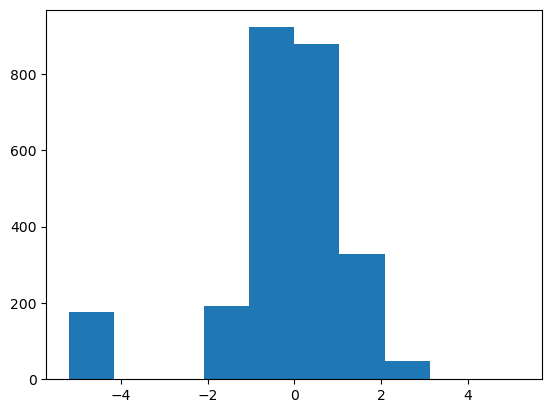

In [ ]:
plt.hist(X['X0'])

In [ ]:
scl = preprocessing.StandardScaler()
scl.fit(X)

X = scl.transform(X)
print(X.shape)
X[0,:]

(2548, 51)


array([-0.36761994,  0.22788458,  1.44334444,  1.91687195,  1.52902881,
       -0.38302552, -0.86652066, -0.95173543, -2.72323057, -2.41235064,
       -3.51604734, -3.53906719, -1.30295838,  0.47151993,  1.34320264,
        1.21499097,  1.25658744,  1.23800262,  0.8805797 ,  0.03300882,
        1.81125648, -0.76030579, -0.9840563 , -0.59064898, -0.27464453,
        0.06427376, -1.57306039,  0.5481297 , -1.24239766, -0.4926981 ,
       -0.60832313, -0.87542251, -1.2281836 , -0.4851307 , -1.74420024,
       -1.1752051 , -1.4812094 , -0.90044636, -1.21334456,  1.7315799 ,
       -0.06258914, -0.54484579,  1.46567792,  0.9445405 , -1.49226858,
        0.16498795,  1.39491233,  1.96307288,  1.39003998,  0.46922838,
       -0.08187587])

In [ ]:
X = np.array(X)

df_sen_dev = df_sen_dev.iloc[dfr.index,:]
df_sen_dev = np.array(df_sen_dev)

X = np.concatenate([X, df_sen_dev], axis=1)
print(X.shape)

(2548, 55)


In [ ]:
class_index = y.index.values
t = df.iloc[y.index, :].groupby(['ACTIVITY'])['ACTIVITY'].count()
print(t)
print(sum(t))

ACTIVITY
A    557
B    989
P    255
R    176
S    571
Name: ACTIVITY, dtype: int64
2548


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   shuffle=True,
                                                   stratify = y)

print(x_train.shape, x_test.shape)

(1911, 55) (637, 55)


In [ ]:
def fit_predict(clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    acu = metrics.accuracy_score(y_test, y_pred)
    print('accuracy score: %.4f' % acu)

    cm = metrics.confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, cmap='binary')
    plt.show()
    print(cm)

    return acu, cm

-------------------------
Logistic Regression
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9655


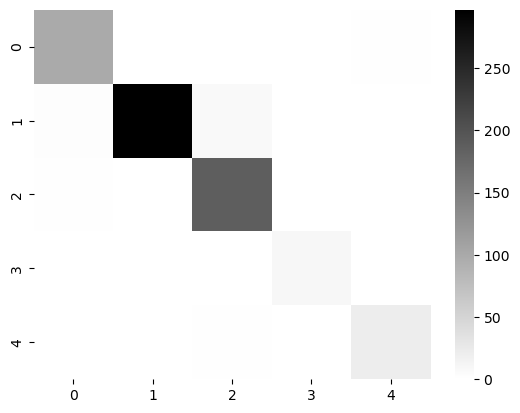

[[ 99   1   0   0   2]
 [  3 297   7   1   1]
 [  2   0 187   0   1]
 [  0   0   1  10   0]
 [  1   0   2   0  22]]
------------------------- 


-------------------------
Logistic Regression CV
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9655


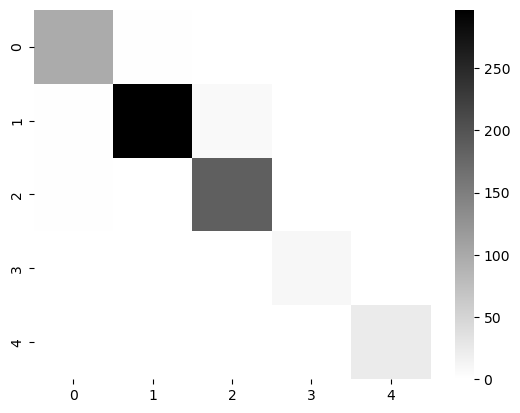

[[ 98   2   1   0   1]
 [  2 297   8   1   1]
 [  2   1 186   0   1]
 [  0   0   1  10   0]
 [  1   0   0   0  24]]
------------------------- 


-------------------------
Ridge Classifier
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9451


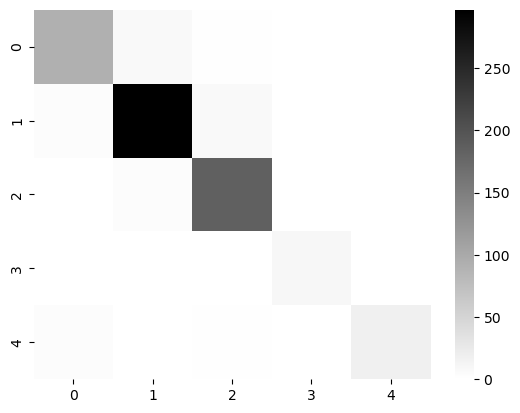

[[ 92   8   2   0   0]
 [  4 297   8   0   0]
 [  1   4 185   0   0]
 [  0   0   1  10   0]
 [  4   1   2   0  18]]
------------------------- 


-------------------------
Ridge Classifier CV
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9451


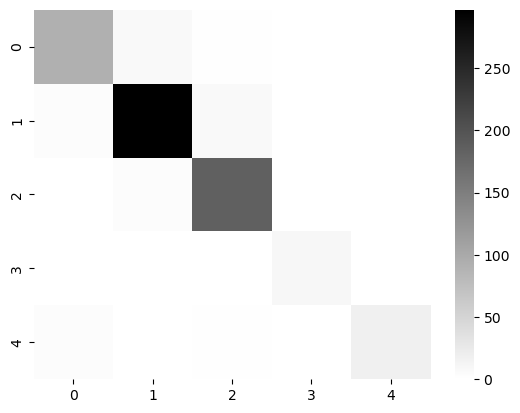

[[ 92   8   2   0   0]
 [  4 297   8   0   0]
 [  1   4 185   0   0]
 [  0   0   1  10   0]
 [  4   1   2   0  18]]
------------------------- 


-------------------------
SGD Classifier
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9513


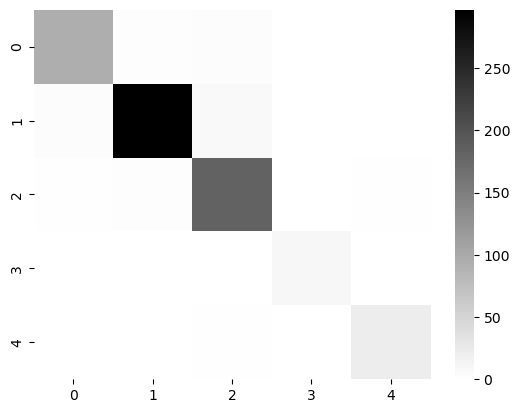

[[ 94   3   4   0   1]
 [  4 297   8   0   0]
 [  2   3 183   0   2]
 [  0   0   1  10   0]
 [  1   0   2   0  22]]
------------------------- 


-------------------------
Perceptron
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9419


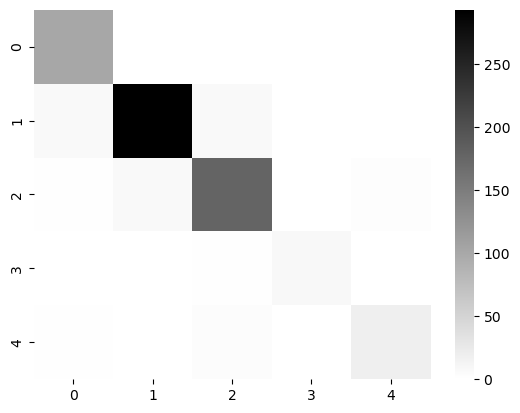

[[101   0   1   0   0]
 [  8 293   8   0   0]
 [  2   7 178   0   3]
 [  0   0   2   9   0]
 [  2   0   4   0  19]]
------------------------- 


-------------------------
Lienar SVC
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



accuracy score: 0.9560


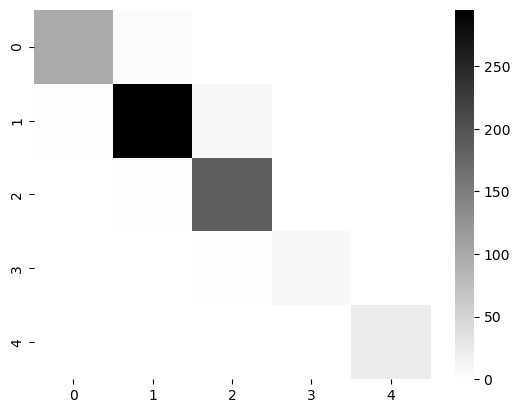

[[ 97   5   0   0   0]
 [  3 295   9   1   1]
 [  1   3 185   0   1]
 [  0   0   2   9   0]
 [  1   0   1   0  23]]
------------------------- 


-------------------------
LDA
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9466


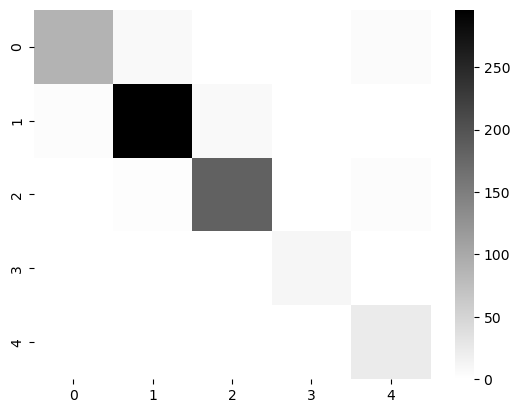

[[ 89   7   1   0   5]
 [  4 296   8   0   1]
 [  0   3 183   0   4]
 [  0   0   0  11   0]
 [  0   0   1   0  24]]
------------------------- 


-------------------------
QDA
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9435


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear



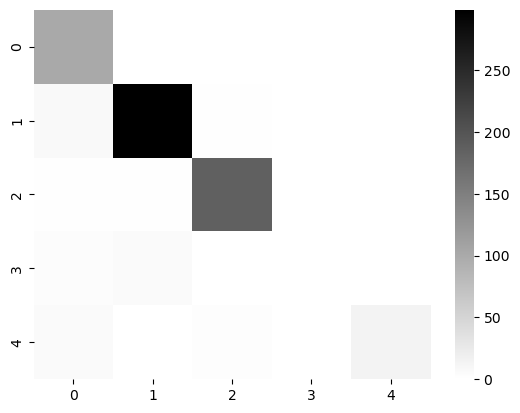

[[101   0   1   0   0]
 [  8 299   2   0   0]
 [  2   2 186   0   0]
 [  4   7   0   0   0]
 [  6   1   3   0  15]]
------------------------- 


-------------------------
Passive Aggressive Classifier
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9482


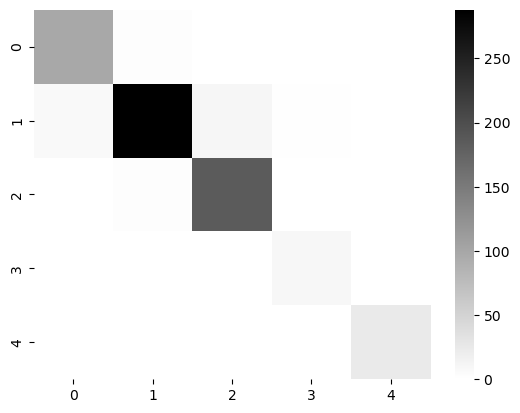

[[ 98   3   0   0   1]
 [  7 288  11   2   1]
 [  1   3 185   0   1]
 [  0   0   1   9   1]
 [  1   0   0   0  24]]
------------------------- 


-------------------------
Random Forest Classifier
['A' 'B' 'P' 'R' 'S']
['A=walking', 'B=Jogging', 'P=Dribbling(Basketball)', 'R=Clapping', 'S=Folding Clothes']
_________________________
accuracy score: 0.9733


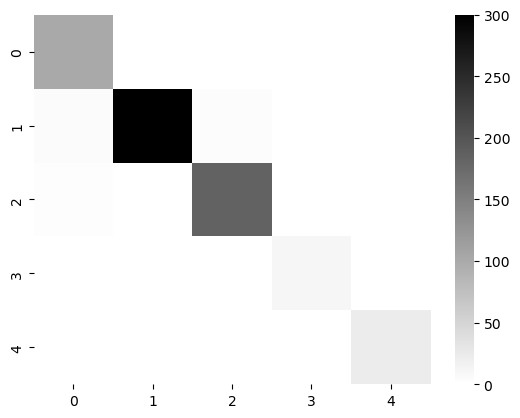

[[101   1   0   0   0]
 [  5 300   4   0   0]
 [  3   1 185   0   1]
 [  0   0   0  11   0]
 [  1   0   1   0  23]]
------------------------- 




In [ ]:
model_list =[
    (linear_model.LogisticRegression(max_iter=int(5e3), penalty='elasticnet', solver='saga', l1_ratio=0.45), 'Logistic Regression'),
    (linear_model.LogisticRegressionCV(cv=3, max_iter=int(5e3), penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.45, 0.75], random_state=0), 'Logistic Regression CV'),
    (linear_model.RidgeClassifier(random_state=0), 'Ridge Classifier'),
    (linear_model.RidgeClassifierCV(alphas=[1e-3, 1e-2, .1, .4, .75, 1]), 'Ridge Classifier CV'),
    (linear_model.SGDClassifier(random_state=0), 'SGD Classifier'),
    (linear_model.Perceptron(random_state=0), 'Perceptron'),
    (svm.LinearSVC(random_state=0), 'Lienar SVC'),
    (LinearDiscriminantAnalysis(), 'LDA'),
    (QuadraticDiscriminantAnalysis(), 'QDA'),
    (linear_model.PassiveAggressiveClassifier(C=.5, random_state=0), 'Passive Aggressive Classifier'),
    (RandomForestClassifier(random_state=0), 'Random Forest Classifier')
]

results=[]

for clf, name in model_list:
    print('-'*25)
    print(name)
    print(np.sort(dfr['ACTIVITY'].unique()))
    print(['A=walking', 'B=Jogging', "P=Dribbling(Basketball)", "R=Clapping", "S=Folding Clothes"])
    print('_'*25)
    results.append((fit_predict(clf), name))
    print('-'*25, '\n\n')